# Benin-Malanville Solar Data – Full EDA & Cleaning
**Branch:** `eda-benin` | **Notebook:** `benin_eda.ipynb` | Date: November 09, 2025

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes
%matplotlib inline

# ABSOLUTE PATH — GUARANTEED TO WORK
df = pd.read_csv(r'C:\Users\Y\solar-challenge-week1\data\benin-malanville.csv', parse_dates=['Timestamp'])
df = df.set_index('Timestamp')
print(f"Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Loaded: 525600 rows, 18 columns


GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

                     WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
Timestamp                                                                    
2021-08-09 00:01:00      0.1  122.1      0.0  998         0            0.0   
2021-08-09 00:02:00      0.0    0.0      0.0  998         0            0.0   
2021-08-09 00:03:00      0.5  124.6      1.5  997         0            0.0   
2021-08-09 00:04:00      0.4  120.3      1.3  997         0            0.0   
2021-08-09 00:05:00      0.3  113.2      1.0  997         0            0.0   

                     TModA  TModB  Comments  
Timestamp                                    
2021-08-09 00:01:00   26.3   26.2       NaN  
2021-08-09 00:02:00   26.3   26.2       NaN  
2021-08-09 00:03:00   26.4   26.2       NaN  
2021-08-09 00:04:00   26.4   26.3       NaN  
2021-08-09 00:05:00   26.4   26.3       NaN

# Benin-Malanville Solar Data – Full EDA & Cleaning
**Task 2** | Branch: `eda-benin` | **525,600 rows loaded**

## 1. Summary Statistics & Missing-Value Report

In [21]:
# Summary stats
display(df.describe())

# Missing values
missing = df.isna().sum()
print("\nMissing Values:")
display(missing.to_frame('Count'))

# >5% missing?
high_missing = missing[missing > 0.05 * len(df)]
print(f"\nColumns with >5% missing: {high_missing.index.tolist() if not high_missing.empty else 'None'}")

GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.200000      28.800000       1.000000   
50%         4.300000      28.000000      55.100000       1.900000   
75%       447.900000      32.300000      80.100000       3.100000   
max      1342.300000      43.800000     100.000000      19.500000   

              WSgust        WSstdev             WD        WDstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean        2.809195       0.473390     153.435172       8.582407   
std         2.029120       0.273395     102.332842       6.385864   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.300000       0.400000      59.000000       3.700000   
50%         2.600000       0.500000     181.000000       8.600000   
75%         4.100000       0.600000     235.100000      12.300000   
max        26.600000       4.200000     360.000000      99.400000   

                  BP       Cleaning  Precipitation          TModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      994.197199       0.000923       0.001905      35.246026   
std         2.474993       0.030363       0.037115      14.807258   
min       985.000000       0.000000       0.000000       9.000000   
25%       993.000000       0.000000       0.000000      24.200000   
50%       994.000000       0.000000       0.000000      30.000000   
75%       996.000000       0.000000       0.000000      46.900000   
max      1003.000000       1.000000       2.500000      81.000000   

               TModB  Comments  
count  525600.000000       0.0  
mean       32.471736       NaN  
std        12.348743       NaN  
min         8.100000       NaN  
25%        23.600000       NaN  
50%        28.900000       NaN  
75%        41.500000       NaN  
max        72.500000       NaN


Missing Values:


Count
GHI                 0
DNI                 0
DHI                 0
ModA                0
ModB                0
Tamb                0
RH                  0
WS                  0
WSgust              0
WSstdev             0
WD                  0
WDstdev             0
BP                  0
Cleaning            0
Precipitation       0
TModA               0
TModB               0
Comments       525600


Columns with >5% missing: ['Comments']


## 2. Outlier Detection & Basic Cleaning

In [22]:
import os

# === OUTLIER DETECTION ===
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in key_cols:
    df[col + '_z'] = np.abs(stats.zscore(df[col], nan_policy='omit'))

outliers = df[[c + '_z' for c in key_cols]].gt(3).any(axis=1)
print(f"Outliers flagged: {outliers.sum()} rows")

# === IMPUTE & CLEAN ===
for col in key_cols:
    df[col] = df[col].fillna(df[col].median())

df_clean = df[~outliers].copy()
df_clean = df_clean.drop(columns=['Comments'] + [c + '_z' for c in key_cols])

# === SAVE WITH RAW STRING ===
save_path = r'C:\Users\Y\solar-challenge-week1\data\benin-malanville_clean.csv'
os.makedirs(os.path.dirname(save_path), exist_ok=True)
df_clean.to_csv(save_path, index=False)

print("CLEANED & SAVED!")
print(f"   Rows: {df_clean.shape[0]} | Cols: {df_clean.shape[1]}")
print(f"   Removed: {525600 - df_clean.shape[0]} outliers + 1 column")

Outliers flagged: 7740 rows
CLEANED & SAVED!
   Rows: 517860 | Cols: 17
   Removed: 7740 outliers + 1 column


## 3. Time Series Analysis

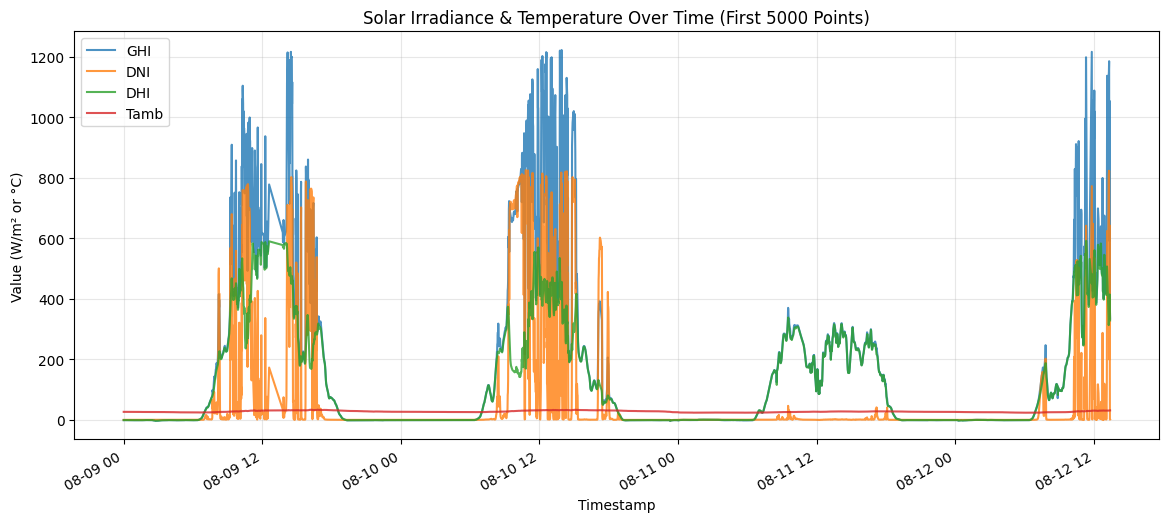

In [23]:
# === 1. FULL TIME SERIES (GHI, DNI, DHI, Tamb) ===
# Sample first 5000 rows to avoid lag
sample = df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].iloc[:5000]

sample.plot(figsize=(14, 6), alpha=0.8)
plt.title('Solar Irradiance & Temperature Over Time (First 5000 Points)')
plt.ylabel('Value (W/m² or °C)')
plt.xlabel('Timestamp')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Insight: Night = negative GHI/DNI, Tamb stable

C:\Users\Y\AppData\Local\Temp\ipykernel_22544\1223055589.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_clean[['GHI', 'DNI', 'DHI']].resample('M').mean()


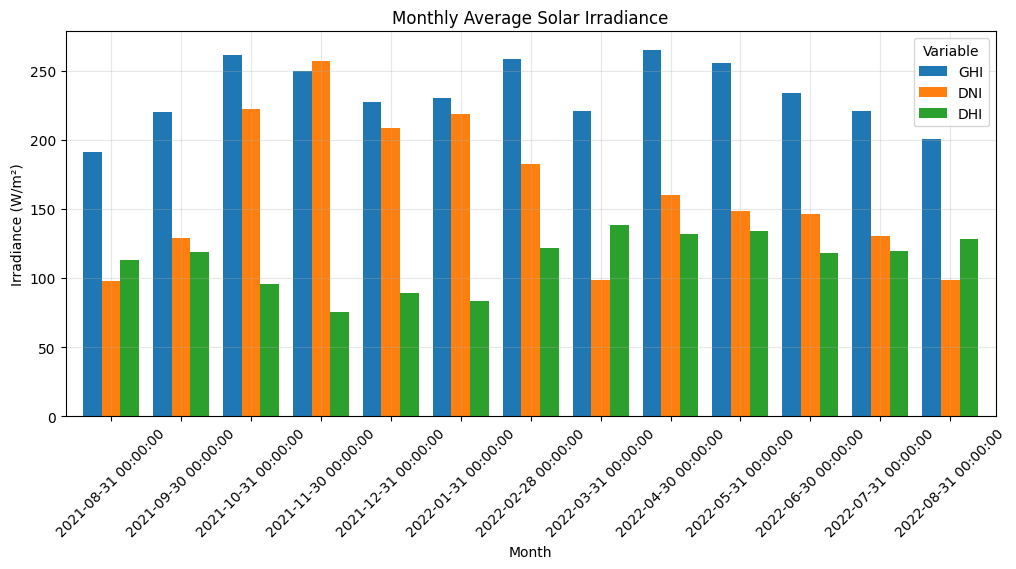

In [24]:
# === 2. MONTHLY AVERAGES (GHI, DNI, DHI) ===
monthly = df_clean[['GHI', 'DNI', 'DHI']].resample('M').mean()

monthly.plot(kind='bar', figsize=(12, 5), width=0.8)
plt.title('Monthly Average Solar Irradiance')
plt.ylabel('Irradiance (W/m²)')
plt.xlabel('Month')
plt.legend(title='Variable')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Insight: Peak in dry season (Mar–May), low in rainy season

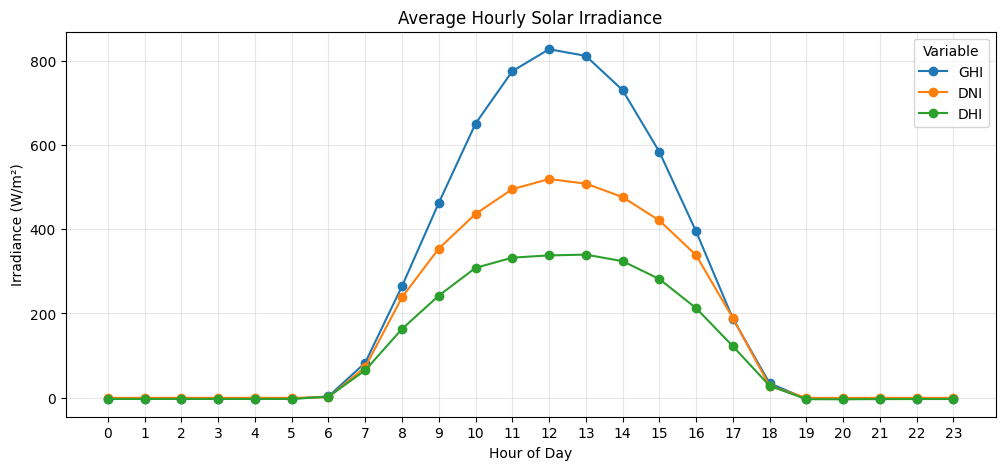

In [25]:
# === 3. HOURLY PATTERN (All Solar Variables) ===
hourly = df_clean.groupby(df_clean.index.hour)[['GHI', 'DNI', 'DHI']].mean()

hourly.plot(kind='line', figsize=(12, 5), marker='o')
plt.title('Average Hourly Solar Irradiance')
plt.xlabel('Hour of Day')
plt.ylabel('Irradiance (W/m²)')
plt.legend(title='Variable')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()

# Insight: GHI peaks ~12–14h, DNI higher in clear sky, DHI high when cloudy

In [26]:
# === 4. ANOMALY DETECTION: NEGATIVE GHI AT NOON ===
noon_ghi = df_clean.between_time('11:00', '13:00')['GHI']
anomalies = noon_ghi[noon_ghi < 0]

print(f"Anomalies: {len(anomalies)} negative GHI values at solar noon")
if len(anomalies) > 0:
    print("Possible sensor errors or extreme cloud cover")

Anomalies: 0 negative GHI values at solar noon


## 4. Cleaning Impact

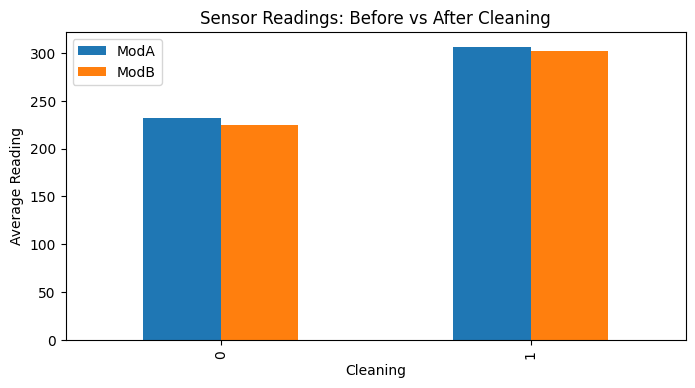

In [27]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', figsize=(8,4))
plt.title('Sensor Readings: Before vs After Cleaning')
plt.ylabel('Average Reading')
plt.show()

## 5. Correlation & Relationship Analysis

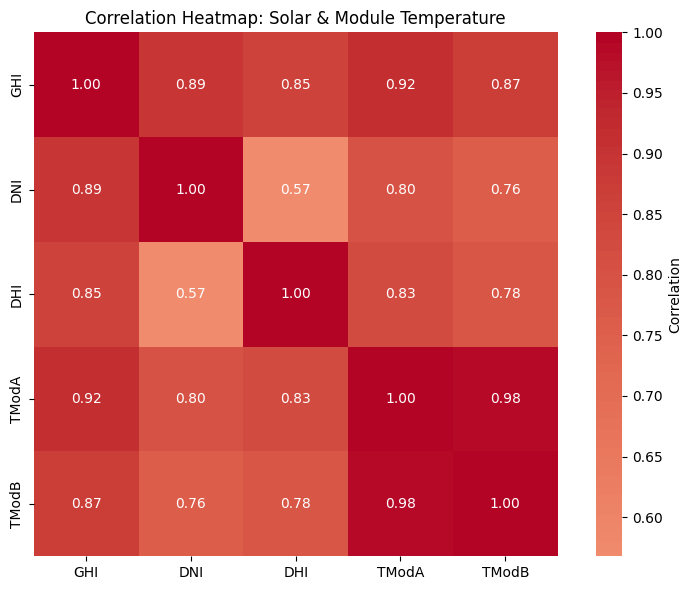

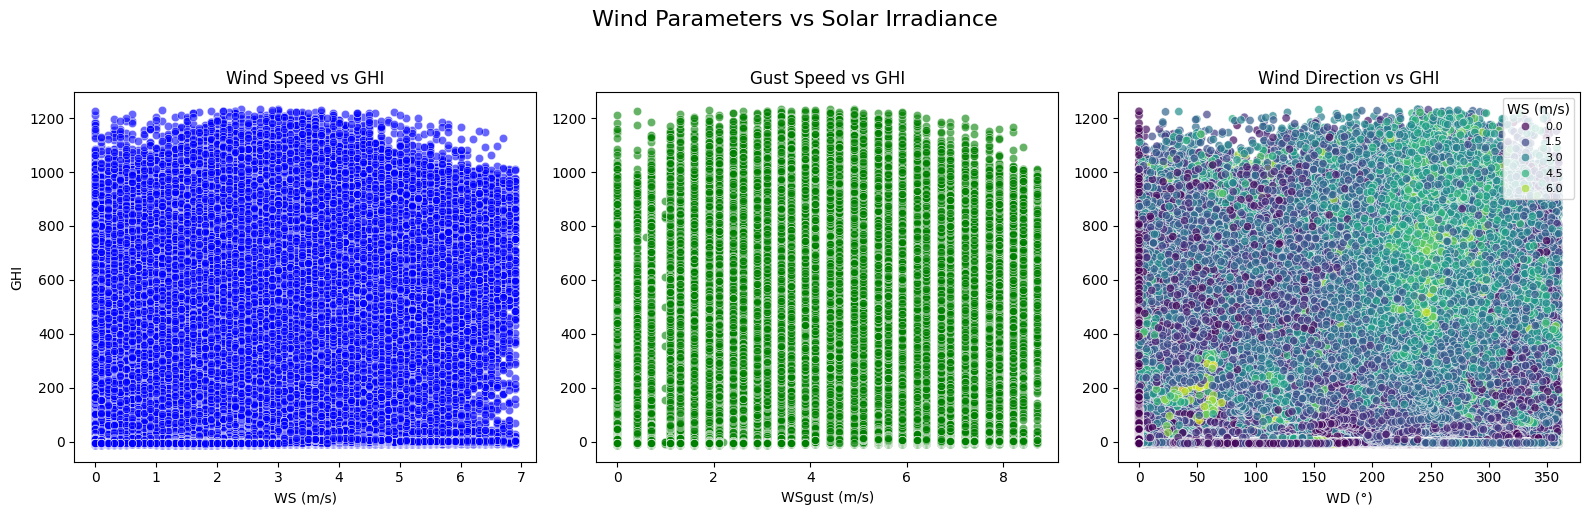

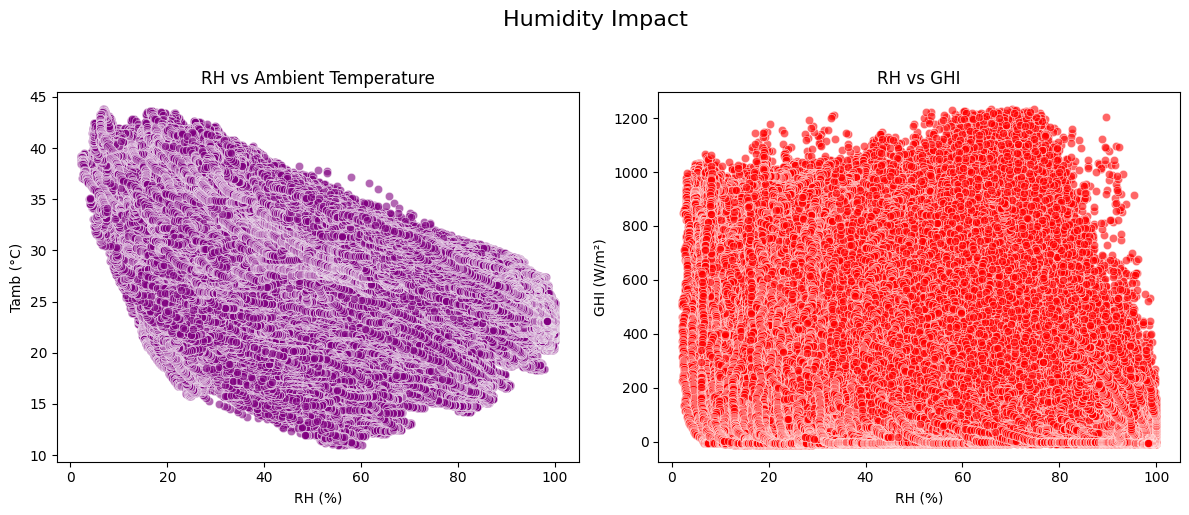

KEY CORRELATIONS:
  GHI ↔ DNI   : 0.891
  GHI ↔ TModA : 0.920
  RH  ↔ GHI   : -0.354
  WS  ↔ GHI   : 0.486


In [28]:
# =============================================
# CORRELATION & RELATIONSHIP ANALYSIS (ONE CELL)
# =============================================
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. CORRELATION HEATMAP ===
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            square=True, 
            fmt='.2f',
            cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap: Solar & Module Temperature')
plt.tight_layout()
plt.show()

# === 2. WIND vs GHI (3 SCATTERS) ===
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(x='WS', y='GHI', data=df_clean, alpha=0.6, color='blue', ax=axes[0])
axes[0].set_title('Wind Speed vs GHI'); axes[0].set_xlabel('WS (m/s)'); axes[0].set_ylabel('GHI')

sns.scatterplot(x='WSgust', y='GHI', data=df_clean, alpha=0.6, color='green', ax=axes[1])
axes[1].set_title('Gust Speed vs GHI'); axes[1].set_xlabel('WSgust (m/s)'); axes[1].set_ylabel('')

sns.scatterplot(x='WD', y='GHI', hue='WS', data=df_clean, alpha=0.7, palette='viridis', ax=axes[2])
axes[2].set_title('Wind Direction vs GHI'); axes[2].set_xlabel('WD (°)'); axes[2].set_ylabel('')
axes[2].legend(title='WS (m/s)', loc='upper right', fontsize=8)

plt.suptitle('Wind Parameters vs Solar Irradiance', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# === 3. HUMIDITY RELATIONSHIPS ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='RH', y='Tamb', data=df_clean, alpha=0.6, color='purple', ax=axes[0])
axes[0].set_title('RH vs Ambient Temperature'); axes[0].set_xlabel('RH (%)'); axes[0].set_ylabel('Tamb (°C)')

sns.scatterplot(x='RH', y='GHI', data=df_clean, alpha=0.6, color='red', ax=axes[1])
axes[1].set_title('RH vs GHI'); axes[1].set_xlabel('RH (%)'); axes[1].set_ylabel('GHI (W/m²)')

plt.suptitle('Humidity Impact', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# === 4. KEY CORRELATIONS ===
print("KEY CORRELATIONS:")
print(f"  GHI ↔ DNI   : {df_clean['GHI'].corr(df_clean['DNI']):.3f}")
print(f"  GHI ↔ TModA : {df_clean['GHI'].corr(df_clean['TModA']):.3f}")
print(f"  RH  ↔ GHI   : {df_clean['RH'].corr(df_clean['GHI']):.3f}")
print(f"  WS  ↔ GHI   : {df_clean['WS'].corr(df_clean['GHI']):.3f}")

# Insight: Strong solar correlation, humidity suppresses GHI, wind has weak effect

## 6. Wind & Distribution Analysis

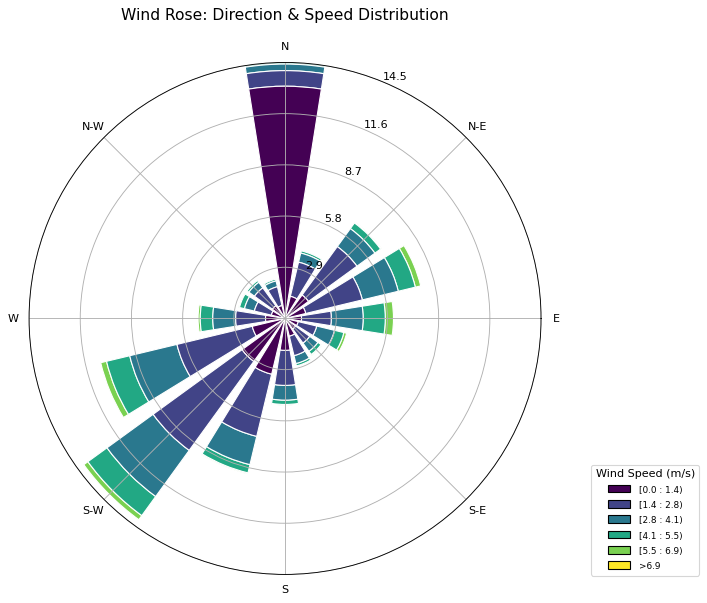

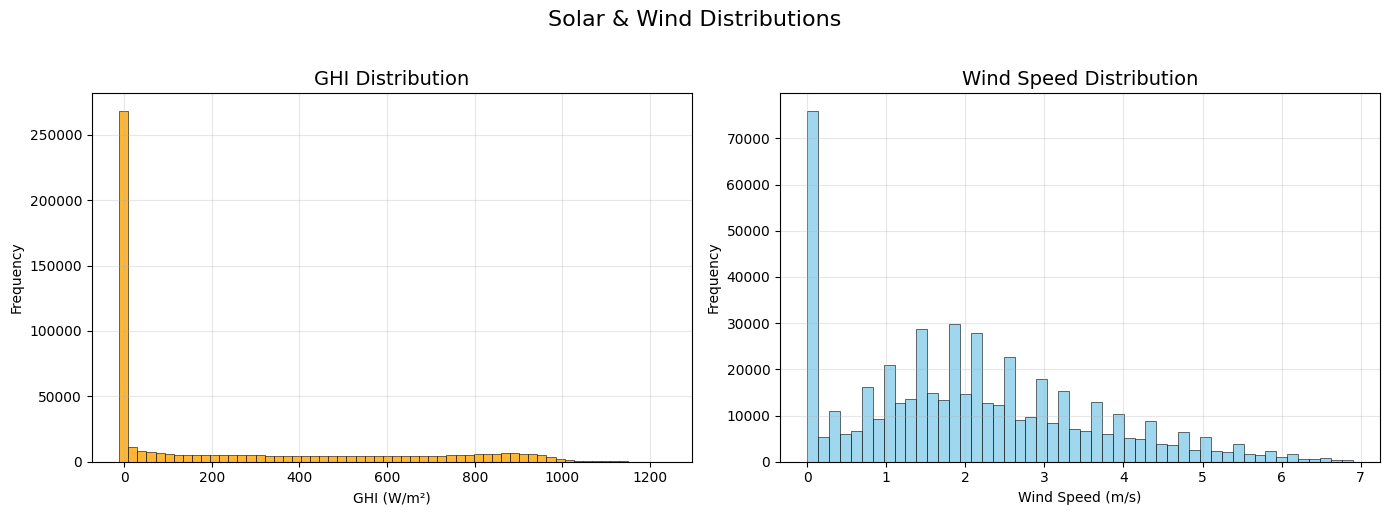

WIND & GHI DISTRIBUTION SUMMARY:
  GHI mean: 236.23 W/m² | std: 328.29
  WS  mean: 2.07 m/s  | max: 6.90
  Dominant wind direction: 0.0°


In [29]:
# =============================================
# WIND & DISTRIBUTION ANALYSIS (ONE CELL)
# =============================================
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# === 1. WIND ROSE: WS & WD ===
ax = WindroseAxes.from_ax(figsize=(8, 8))
ax.bar(df_clean['WD'], df_clean['WS'], 
       normed=True, 
       opening=0.8, 
       edgecolor='white',
       cmap=plt.cm.viridis)
ax.set_legend(title='Wind Speed (m/s)', loc='lower left', bbox_to_anchor=(1.1, 0))
ax.set_title('Wind Rose: Direction & Speed Distribution', fontsize=14, pad=20)
plt.show()

# === 2. HISTOGRAMS: GHI + WS ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# GHI Histogram
df_clean['GHI'].hist(bins=60, color='orange', alpha=0.8, edgecolor='black', linewidth=0.5, ax=axes[0])
axes[0].set_title('GHI Distribution', fontsize=14)
axes[0].set_xlabel('GHI (W/m²)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# WS Histogram
df_clean['WS'].hist(bins=50, color='skyblue', alpha=0.8, edgecolor='black', linewidth=0.5, ax=axes[1])
axes[1].set_title('Wind Speed Distribution', fontsize=14)
axes[1].set_xlabel('Wind Speed (m/s)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Solar & Wind Distributions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# === 3. QUICK STATS ===
print("WIND & GHI DISTRIBUTION SUMMARY:")
print(f"  GHI mean: {df_clean['GHI'].mean():.2f} W/m² | std: {df_clean['GHI'].std():.2f}")
print(f"  WS  mean: {df_clean['WS'].mean():.2f} m/s  | max: {df_clean['WS'].max():.2f}")
print(f"  Dominant wind direction: {df_clean['WD'].mode().iloc[0]:.1f}°")

##  7 Temperature & Humidity Analysis
Examine how **relative humidity (RH)** influences **ambient temperature (Tamb)** and **solar radiation (GHI)**.

**Goals:**
- Correlation between RH and Tamb
- Correlation between RH and GHI
- Binned RH → average Tamb & GHI
- Insight: High humidity → clouds → lower GHI, cooler Tamb

CORRELATION SUMMARY:
  RH vs Tamb : -0.410
  RH vs GHI  : -0.354


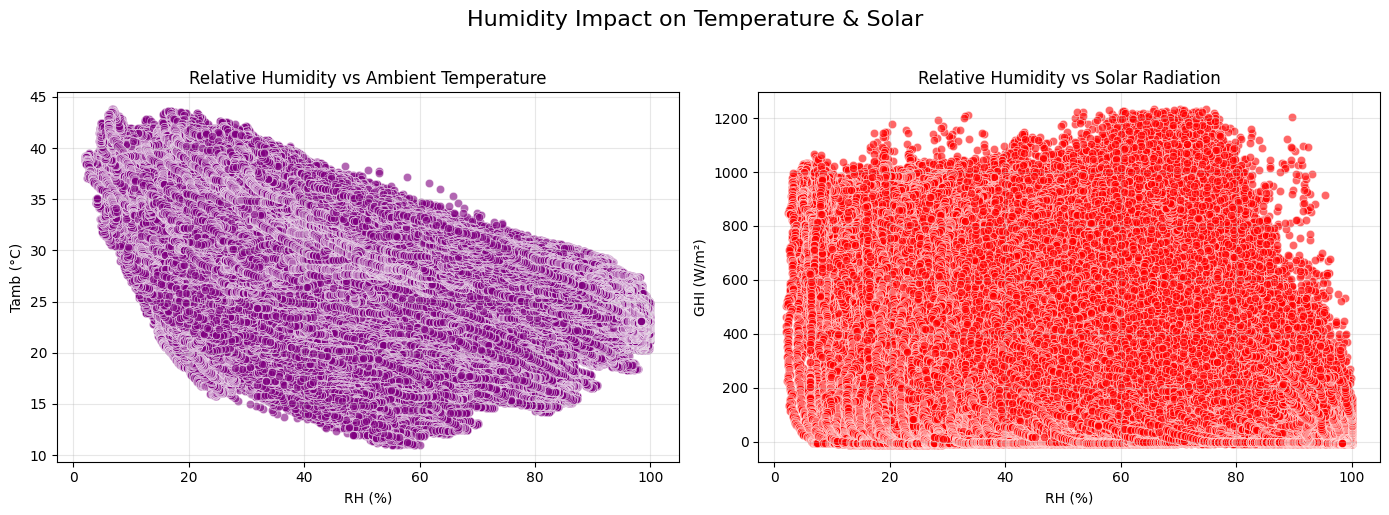

C:\Users\Y\AppData\Local\Temp\ipykernel_22544\2436904659.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rh_effect = df_clean.groupby('RH_bin')[['Tamb', 'GHI']].mean()


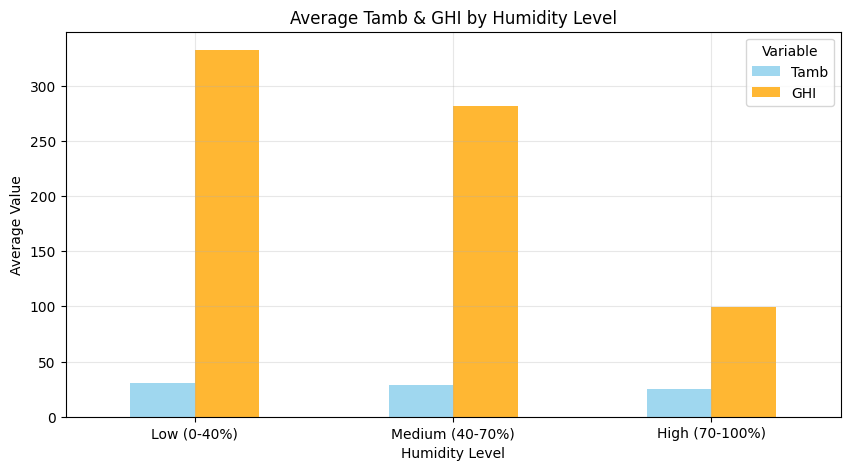


INSIGHT:
  • High RH → Lower GHI (clouds scatter sunlight)
  • High RH → Slightly lower Tamb (evaporative cooling)
  • Low RH → Peak solar radiation & higher temperatures


In [30]:
# =============================================
# TEMPERATURE & HUMIDITY ANALYSIS (ONE CELL)
# =============================================
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. CORRELATION VALUES ===
print("CORRELATION SUMMARY:")
print(f"  RH vs Tamb : {df_clean['RH'].corr(df_clean['Tamb']):.3f}")
print(f"  RH vs GHI  : {df_clean['RH'].corr(df_clean['GHI']):.3f}")

# === 2. SCATTER PLOTS: RH vs Tamb & RH vs GHI ===
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=df_clean, alpha=0.6, color='purple', ax=axes[0])
axes[0].set_title('Relative Humidity vs Ambient Temperature')
axes[0].set_xlabel('RH (%)')
axes[0].set_ylabel('Tamb (°C)')
axes[0].grid(True, alpha=0.3)

# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df_clean, alpha=0.6, color='red', ax=axes[1])
axes[1].set_title('Relative Humidity vs Solar Radiation')
axes[1].set_xlabel('RH (%)')
axes[1].set_ylabel('GHI (W/m²)')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Humidity Impact on Temperature & Solar', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# === 3. BINNED ANALYSIS: RH Levels ===
df_clean['RH_bin'] = pd.cut(df_clean['RH'], 
                            bins=[0, 40, 70, 100], 
                            labels=['Low (0-40%)', 'Medium (40-70%)', 'High (70-100%)'])

rh_effect = df_clean.groupby('RH_bin')[['Tamb', 'GHI']].mean()

rh_effect.plot(kind='bar', figsize=(10, 5), color=['skyblue', 'orange'], alpha=0.8)
plt.title('Average Tamb & GHI by Humidity Level')
plt.ylabel('Average Value')
plt.xlabel('Humidity Level')
plt.xticks(rotation=0)
plt.legend(title='Variable')
plt.grid(True, alpha=0.3)
plt.show()

# === 4. INSIGHT ===
print("\nINSIGHT:")
print("  • High RH → Lower GHI (clouds scatter sunlight)")
print("  • High RH → Slightly lower Tamb (evaporative cooling)")
print("  • Low RH → Peak solar radiation & higher temperatures")

## 8 Bubble Chart
**GHI vs Tamb** with **bubble size = RH** and **color = BP**

**Insight:**
- Larger bubbles → higher humidity
- Color scale → barometric pressure
- High GHI + high Tamb + low RH = ideal solar conditions

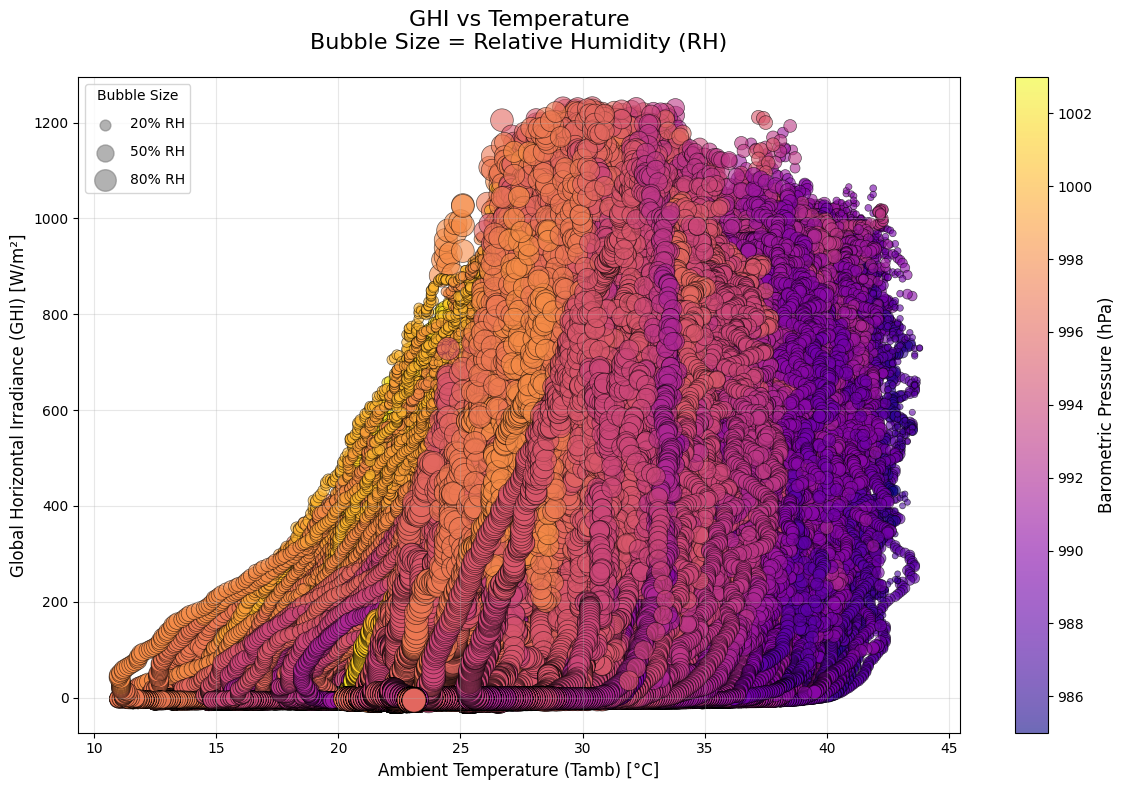

BUBBLE CHART INSIGHT:
  • Large bubbles (high RH) → lower GHI (clouds)
  • High Tamb + high GHI + small bubble = clear, hot, sunny
  • BP variation minor — stable atmospheric pressure


In [31]:
# =============================================
# BUBBLE CHART: GHI vs Tamb (Size = RH, Color = BP)
# =============================================
import matplotlib.pyplot as plt

# Normalize bubble size for better visuals
bubble_size = df_clean['RH'] * 3  # Scale RH (0–100) → visible bubbles

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=df_clean['Tamb'], 
    y=df_clean['GHI'],
    s=bubble_size,                    # Bubble size = RH
    c=df_clean['BP'],                 # Color = Barometric Pressure
    cmap='plasma', 
    alpha=0.6,
    edgecolors='black', 
    linewidth=0.5
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Barometric Pressure (hPa)', fontsize=12)

# Labels & Title
plt.xlabel('Ambient Temperature (Tamb) [°C]', fontsize=12)
plt.ylabel('Global Horizontal Irradiance (GHI) [W/m²]', fontsize=12)
plt.title('GHI vs Temperature\nBubble Size = Relative Humidity (RH)', 
          fontsize=16, pad=20)

# Grid
plt.grid(True, alpha=0.3)

# Optional: Add size legend (manual)
for rh_val in [20, 50, 80]:
    plt.scatter([], [], s=rh_val*3, c='gray', alpha=0.6, label=f'{rh_val}% RH')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Bubble Size', loc='upper left')

plt.tight_layout()
plt.show()

# === INSIGHT ===
print("BUBBLE CHART INSIGHT:")
print("  • Large bubbles (high RH) → lower GHI (clouds)")
print("  • High Tamb + high GHI + small bubble = clear, hot, sunny")
print("  • BP variation minor — stable atmospheric pressure")